In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
import pickle
import cv2
import matplotlib.pyplot as plt
glow_dir = '/project/fashion-flow/glow-edited/'
sys.path.append(glow_dir)
import tensorflow as tf
import os
from train import *

In [ ]:
IMAGE_SIZE = 32

In [3]:
logs_dir = os.path.join(glow_dir, 'logs')

In [4]:
hvd.init()
sess = tensorflow_session()

In [5]:
with open(os.path.join(glow_dir, 'hps.pkl'), 'rb') as f:
    hps = pickle.load(f)

In [6]:
hps.restore_path = os.path.join(logs_dir, '32x32image_logs', 'epoch990.ckpt')
hps.inference = True

In [7]:
train_iterator, test_iterator, data_init = get_data(hps, sess)

Rank 0 Batch sizes Train 64 Test 50 Init 256


In [8]:
hps.train_its, hps.test_its, hps.full_test_its = get_its(hps)

20000 50 1
Train epoch size: 1024


In [9]:
import model
model = model.model(sess, hps, train_iterator, test_iterator, data_init)

Creating pad 1_1_18_18
Creating pad 1_1_10_10
Creating pad 1_1_6_6


KeyboardInterrupt: 

In [4]:
import h5py
PROJECT_DIR = '/project/fashion-flow'
DATA_DIR = os.path.join(PROJECT_DIR, 'data')
DEEPFASHION_DIR = os.path.join(DATA_DIR, 'DeepFashion', 'FashionSynthesis')
f = h5py.File(os.path.join(DEEPFASHION_DIR, 'G2.h5'), 'r')
segmentations_ds = f['b_']
images_ds = f['ih']

In [5]:
def resize_image(image, size=IMAGE_SIZE):
    return cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)

In [6]:
ghost = resize_image(f['ih_mean'].value.T)

#### Manually getting labels for white top and black top

In [10]:
offset = 900

In [12]:
blues = [3, 12, 38, 32, 68, 140, 145, 150, 263, 306, 394, 411, 444, 451, 454, 509, 524, 
         520, 518, 537, 544, 532, 586, 602, 635, 636, 647]
reds = [13, 49, 61, 56, 74, 101, 171, 189, 196, 217, 290, 285, 341, 414, 415, 424, 428, 
        434, 458, 462, 471, 476, 542, 578, 624, 651, 663]
greens = [127, 229, 265, 437, 528, 558, 552, 594, 646, 780, 788, 879, 953, 1034]
if len(reds) >= 20: print('red done')
if len(blues) >= 20: print('blue done')
if len(greens) >= 20: print('green done')

red done
blue done


In [13]:
offset+=100

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

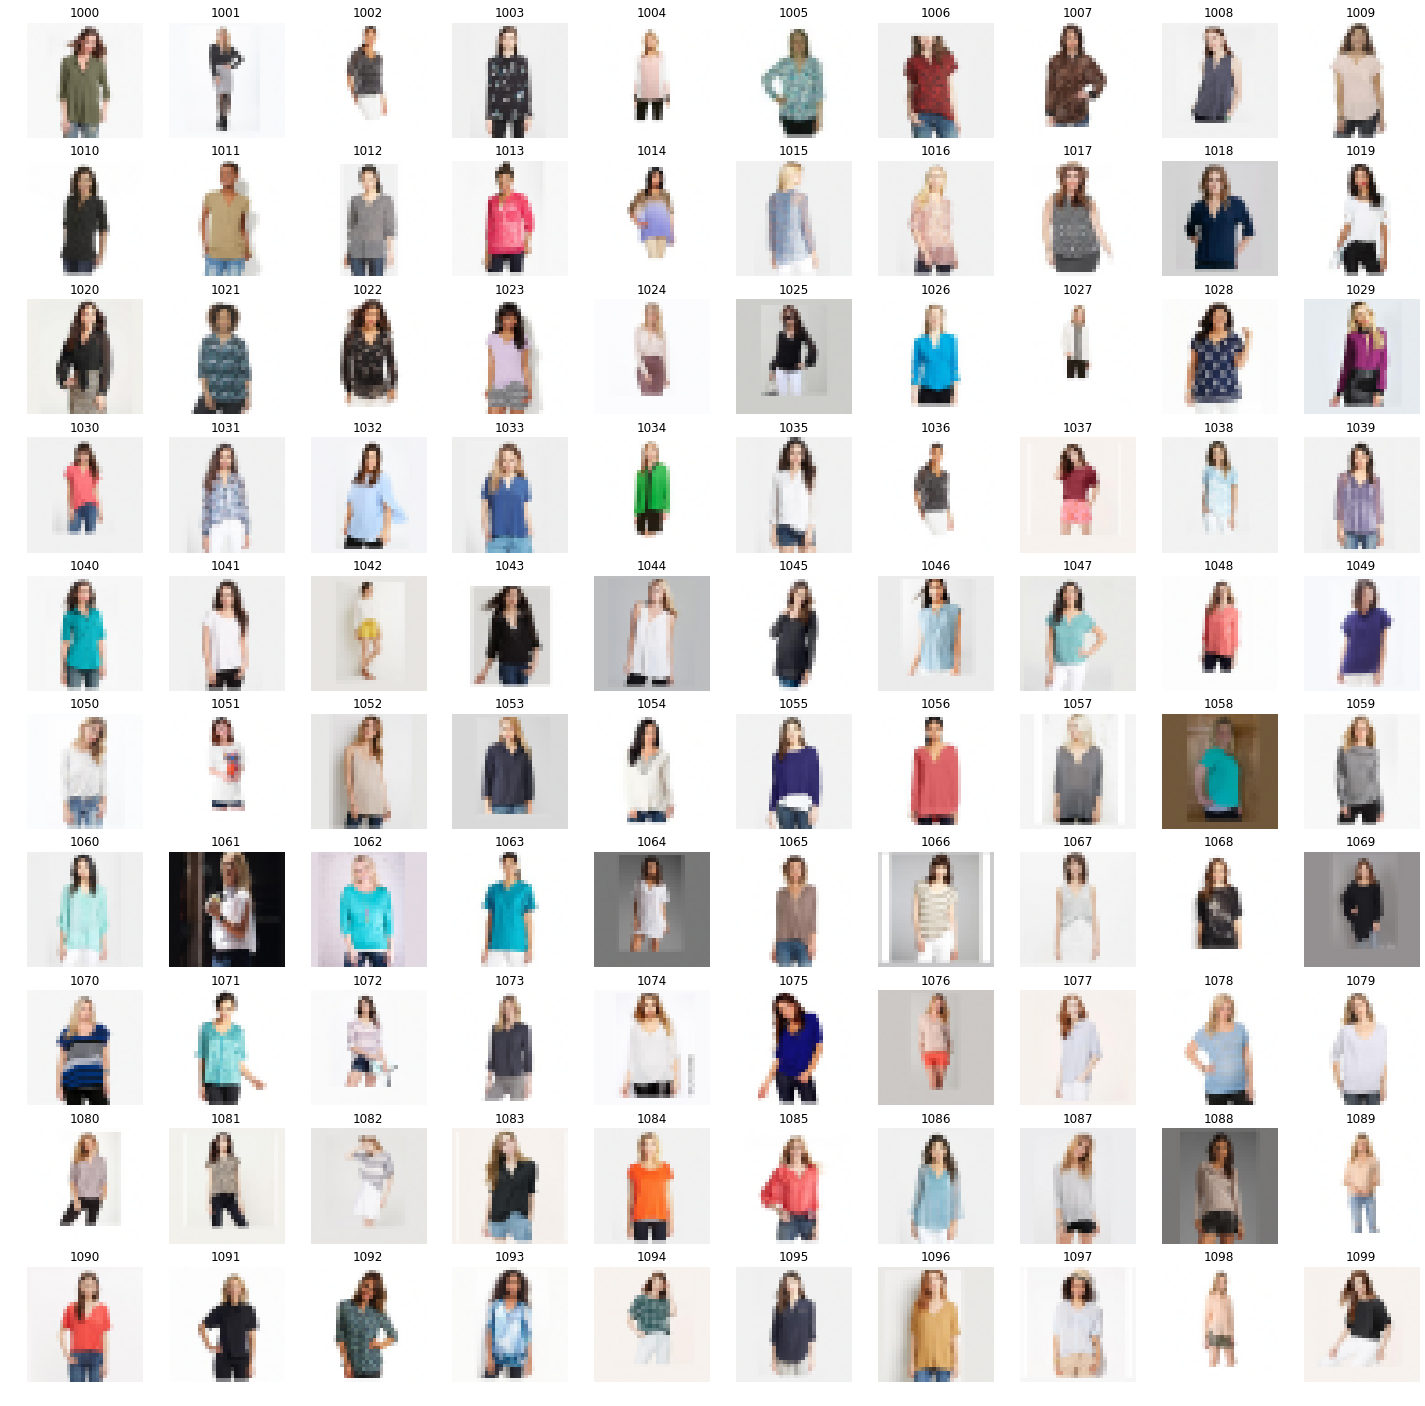

In [14]:
num_rows = 10
num_cols = 10
fig, axes = plt.subplots(num_rows, num_rows, figsize=(25, 25))
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_rows + j + offset
        img = resize_image(images_ds[index].T) + ghost
        axes[i, j].axis("off")
        axes[i, j].set_title('{}'.format(index))
        axes[i, j].imshow(img) 

In [68]:
def get_average_embedding(ixx, input_shape=(32,32,3)):
    embeddings = np.empty(len(ix), np.product(input_shape))
    for i, ix in enumerate(ixx):
        img = resize_image(images_ds[ix].T) + ghost
        img = img[None, :]
        y = np.zeros([1], dtype=np.int32)
        emb = model.encode(img*255, y)
        embeddings[i] = emb
    return np.mean(embeddings, 0)

In [69]:
white_encodings_avg = np.mean(white_encodings,0)

NameError: name 'white_encodings' is not defined

#### Trying out manipulations

In [ ]:
from IPython.display import display
from ipywidgets import widgets, interactive

In [2]:
x=widgets.IntSlider

In [18]:
a = 1
b = 2
c =3

In [47]:
def f(a, b, c, d):
    print(a)

In [45]:
def f(a, b, c, d):
    eps = eps1 + red_direction * a, 
    print('b: {}'.format(y))

In [8]:
w = interactive(f, a=widgets.IntSlider(1), b=1, c=1, d=1);

NameError: name 'f' is not defined

In [56]:
display(w)

1


In [9]:
x=widgets.IntSlider(min=-10, max=30, step=1, value=10)

In [11]:
display(x)

IntSlider(value=10, max=30, min=-10)

In [146]:
np.save('white_top_direction.npy', white_top_direction)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


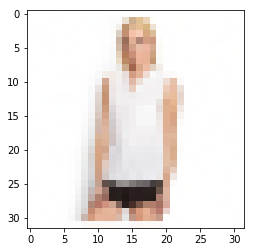

In [143]:
img1 = resize_image(images_ds[30].T) + ghost
plt.imshow(img1)
img1 = img1[None, :]

y = np.zeros([1], dtype=np.int32)

eps1 = model.encode(img1*255, y)

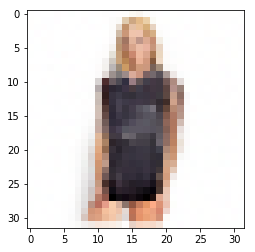

In [144]:
eps_white = eps1 + white_top_direction * -1.5
x_hat = model.decode(y, eps_white)

x_hat[0].shape

plt.imshow((x_hat[0]))

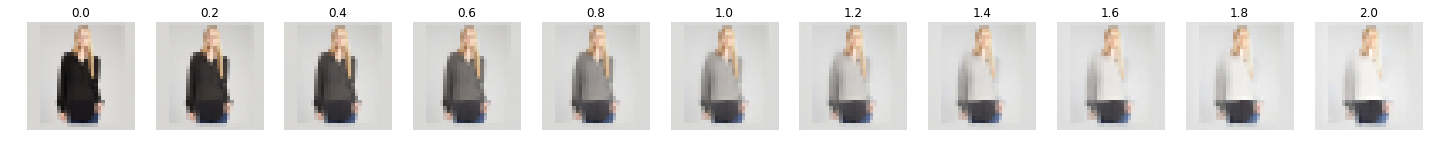

In [135]:
fig, axes = plt.subplots(1, 11, figsize=(25, 5))
for i in range(11):
    eps = eps1 + white_top_direction * i/5
    x_hat = model.decode(y, eps)
    axes[i].set_title('{:.1f}'.format(i*.2))
    axes[i].imshow(x_hat[0])
    axes[i].axis('off')